In [67]:
include("../pic3d.jl")
using .PIC3D
using PyPlot
using LinearAlgebra
using Printf

In [16]:
PIC3D.E_ex[1] = -1.0
electron = PIC3D.Species(q=PIC3D.q_e, m=PIC3D.m_e)
push!(electron.x, [0.0, 0.0, 0.0])
push!(electron.v, [0.0, 0.0, 0.0])

timesteps = 5
historyxx = []
historyvel = []
push!(historyxx, [0.0, 0.0, 0.0])
push!(historyvel, [0.0, 0.0, 0.0])

for i = 1:timesteps
    println(i)
    PIC3D.timestep!(electron)
    push!(historyxx, [electron.x[1]...])
    push!(historyvel, [electron.v[1]...])
end

1
2
3
4
5


In [17]:
q_e = -1.60217662e-19 # charge of electron C = A*s
m_e = 9.10938356e-31 # mass of electron kg
a = (q_e/m_e) * [-1,0,0]
time = 1:5
time *= 1e-9
vel_an = [a*t for t in time]
xx_an = [(a*t^2 / 2) for t in time]
pushfirst!(vel_an, [0,0,0])
pushfirst!(xx_an, [0,0,0])
;

In [17]:
xx_an

6-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0]
 [8.794100113619544e-8, -0.0, -0.0]
 [3.517640045447818e-7, -0.0, -0.0]
 [7.914690102257592e-7, -0.0, -0.0]
 [1.407056018179127e-6, -0.0, -0.0]
 [2.198525028404886e-6, -0.0, -0.0]

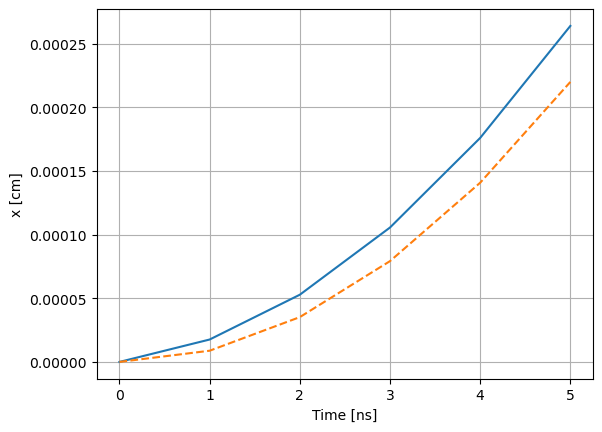

PyObject Text(24.0, 0.5, 'x [cm]')

In [18]:
plt.plot(0:5, [x[1]*100 for x in historyxx], linestyle="solid")
plt.plot(0:5, [x[1]*100 for x in xx_an], linestyle="dashed")
plt.grid()
plt.xlabel("Time [ns]")
plt.ylabel("x [cm]")

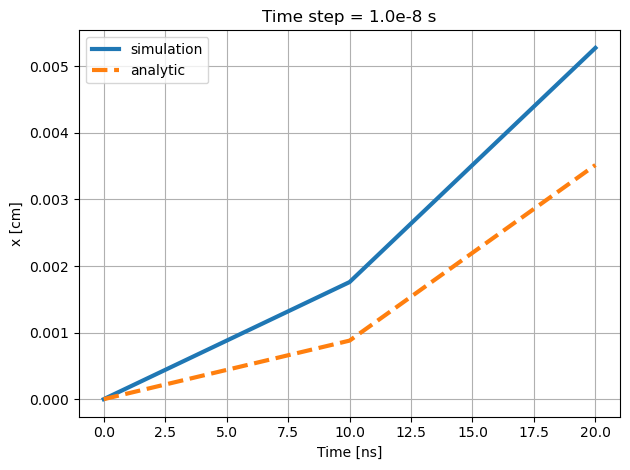

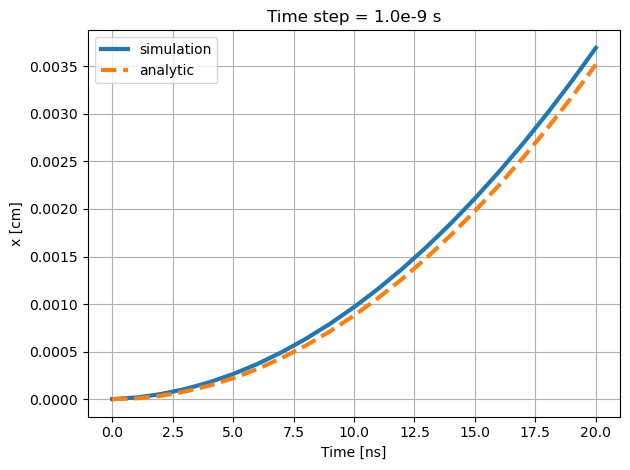

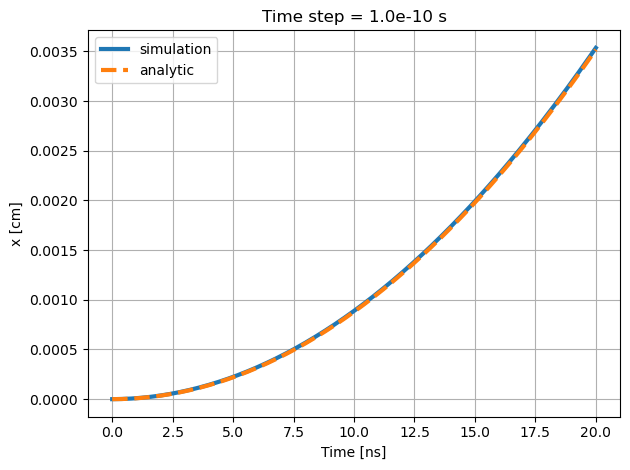

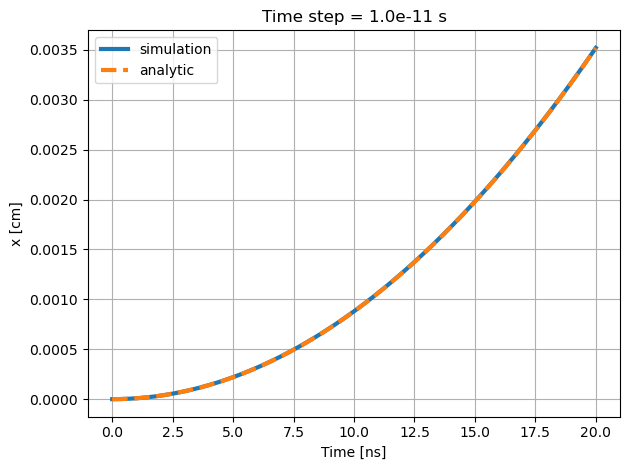

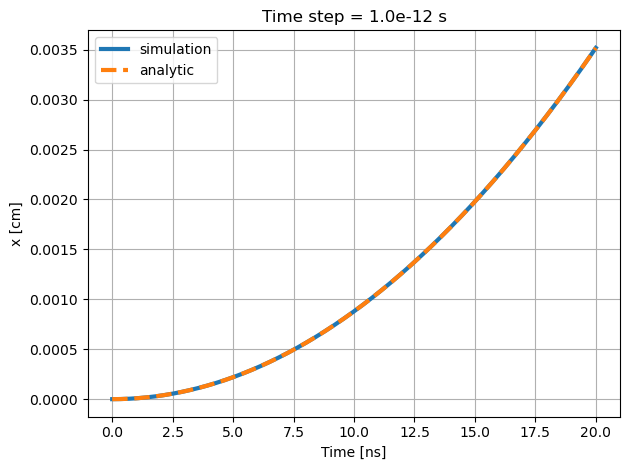

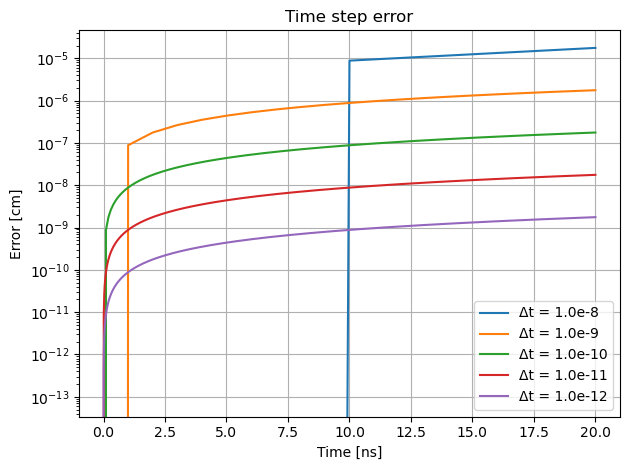

In [68]:
times = [10, 1.0, 0.1, 0.01, 0.001]
q_e = -1.602176634e-19
m_e = 9.1093837139e-31
E_ex = [-1,0,0]

PIC3D.E_ex[1] = -1.0
electron = PIC3D.Species(q=PIC3D.q_e, m=PIC3D.m_e)
push!(electron.x, [0.0, 0.0, 0.0])
push!(electron.v, [0.0, 0.0, 0.0])

duration = 20
historyxx = []
historyvel = []
xerrors = [0.0]
wyk = [8,9,10,11,12]
count = 0
for dt in times
    count += 1
    empty!(electron.x)
    empty!(electron.v)
    push!(electron.x, [0.0, 0.0, 0.0])
    push!(electron.v, [0.0, 0.0, 0.0])
    xx_an = []
    vel_an = []
    historyxx = []
    historyvel = []
    push!(historyxx, [0.0, 0.0, 0.0])
    push!(historyvel, [0.0, 0.0, 0.0])
    push!(vel_an, [0,0,0])
    push!(xx_an, [0,0,0])
    for i = 1:ceil(Int, duration/dt)
        PIC3D.timestep!(electron, dt)
        push!(historyxx, [electron.x[1]...])
        push!(historyvel, [electron.v[1]...])

        va = (q_e/m_e) * E_ex * (1e-9 * dt) *i
        xa = 0.5*(q_e/m_e) * E_ex * ((1e-9 * dt)*i)^2
        push!(vel_an, va)
        push!(xx_an, xa)
    end
    fig = plt.figure()
    plt.plot(0:(1*dt):duration, [x[1]*100 for x in historyxx], linewidth=3, linestyle="solid", label="simulation")
    plt.plot(0:(1*dt):duration, [x[1]*100 for x in xx_an], linewidth=3,linestyle="dashed", label="analytic")
    plt.grid()
    plt.legend()
    plt.xlabel("Time [ns]")
    plt.ylabel("x [cm]")
    plt.title("Time step = 1.0e-$(wyk[count]) s")
    plt.tight_layout()
    plt.savefig("Eex_step_1.0e-$(wyk[count]).png")
end

fig = plt.figure()
count = 0
for dt in times
    count += 1
    empty!(electron.x)
    empty!(electron.v)
    push!(electron.x, [0.0, 0.0, 0.0])
    push!(electron.v, [0.0, 0.0, 0.0])
    xx_an = []
    vel_an = []
    push!(vel_an, [0,0,0])
    push!(xx_an, [0,0,0])
    xerrors = [0.0]
    for i = 1:ceil(Int, duration/dt)
        PIC3D.timestep!(electron, dt)
        push!(historyxx, [electron.x[1]...])
        push!(historyvel, [electron.v[1]...])

        va = (q_e/m_e) * E_ex * (1e-9 * dt) *i
        xa = 0.5*(q_e/m_e) * E_ex * ((1e-9 * dt)*i)^2
        push!(vel_an, va)
        push!(xx_an, xa)

        diff = electron.x[1] .- xa
        er = sqrt(dot(diff, diff))
        push!(xerrors, er)
    end
    
    plt.plot(0:(1*dt):duration, xerrors, linestyle="solid", label="Δt = 1.0e-$(wyk[count])")
    #push!(history, xerrors[1:(floor(Int,tt/dt/5)):end])
end
plt.xlabel("Time [ns]")
plt.ylabel("Error [cm]")
plt.title("Time step error")
plt.grid()
plt.tight_layout()
plt.legend()
plt.savefig("Error_step.png")
plt.yscale("log")
plt.tight_layout()
plt.savefig("Error_step_lim.png")
#println(xerrors[:])

In [47]:
q_e = -1.60217662e-19 # charge of electron C = A*s
m_e = 9.10938356e-31 # mass of electron kg
a = (q_e/m_e) * [-1,0,0]
time = 1:50
time *= 1e-10
vel_an = [a*t for t in time]
xx_an = [(a*t^2 / 2) for t in time]
pushfirst!(vel_an, [0,0,0])
pushfirst!(xx_an, [0,0,0])
;

In [62]:
dxs = [0.2, 0.1, 5e-2, 1e-2]
PIC3D.E_ex[1] = -1.0
electron = PIC3D.Species(q=PIC3D.q_e, m=PIC3D.m_e)
push!(electron.x, [0.0, 0.0, 0.0])
push!(electron.v, [0.0, 0.0, 0.0])

timesteps = 50
historyxx4 = []
historyvel4 = []
push!(historyxx4, [0.0, 0.0, 0.0])
push!(historyvel4, [0.0, 0.0, 0.0])

for i = 1:timesteps
    #println(i)
    PIC3D.timestep!(electron, 0.1)
    push!(historyxx4, [electron.x[1]...])
    push!(historyvel4, [electron.v[1]...])
end

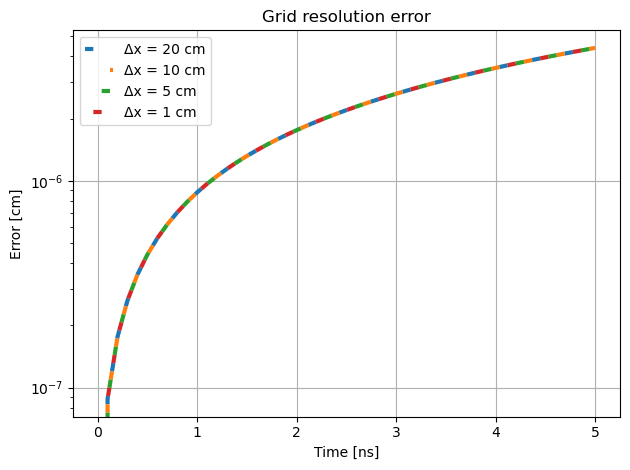

In [66]:
#1 -> 5 cm
#2 -> 10 cm
#3 -> 20 cm
#4 -> 1 cm
plt.plot(0:0.1:5.0, [sqrt(dot(historyxx3[i] .- xx_an[i], historyxx3[i] .- xx_an[i]))*100 for i in eachindex(historyxx3)], linewidth=3, linestyle=(0, (2, 6)), label="Δx = 20 cm")
plt.plot(0:0.1:5.0, [sqrt(dot(historyxx2[i] .- xx_an[i], historyxx2[i] .- xx_an[i]))*100  for i in eachindex(historyxx2)], linewidth=3, linestyle=(2, (2, 6)), label="Δx = 10 cm")
plt.plot(0:0.1:5.0, [sqrt(dot(historyxx1[i] .- xx_an[i], historyxx1[i] .- xx_an[i]))*100  for i in eachindex(historyxx1)], linewidth=3, linestyle=(4, (2,6)), label="Δx = 5 cm")
plt.plot(0:0.1:5.0, [sqrt(dot(historyxx4[i] .- xx_an[i], historyxx4[i] .- xx_an[i]))*100  for i in eachindex(historyxx4)], linewidth=3, linestyle=(6, (2, 6)), label="Δx = 1 cm")
plt.xlabel("Time [ns]")
plt.ylabel("Error [cm]")
plt.title("Grid resolution error")
plt.grid()
plt.tight_layout()
plt.legend()
plt.savefig("Error_grid_e.png")
plt.yscale("log")
plt.tight_layout()
plt.savefig("Error_grid_e_log.png")